# Import packages

In [1]:
# Import required packages
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Define exponential function

In [2]:
# Function to calculate the exponential with constants a and b
def exponential(x, a, b):
    return a*np.exp(b*x)

# Create dummy dataset with noise from a normal distribution

In [3]:
# Generate dummy dataset
x_dummy = np.linspace(start=5, stop=15, num=50)
y_dummy = exponential(x_dummy, 0.5, 0.5)

In [4]:
# Add noise from a Gaussian distribution
noise = 5*np.random.normal(size=y_dummy.size)
y_dummy = y_dummy + noise

# Plot noisy exponential data

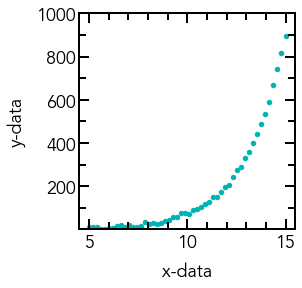

In [5]:
# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

# Create figure object and store it in a variable called 'fig'
fig = plt.figure(figsize=(3, 3))

# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])

# Edit the major and minor ticks of the x and y axes
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')

# Edit the major and minor tick locations of x and y axes
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(200))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(100))

# Plot the noisy exponential data
ax.scatter(x_dummy, y_dummy, s=20, color='#00b3b3', label='Data')

# Add the x and y-axis labels
ax.set_xlabel('x-data', labelpad=10)
ax.set_ylabel('y-data', labelpad=10)

# Set the axis limits
ax.set_xlim(4.5, 15.5)
ax.set_ylim(1, 1000)

#plt.savefig('dummy_dataset_exponential.png', dpi=100, bbox_inches='tight')
plt.show()

# Plot exponential data on a semi-log plot

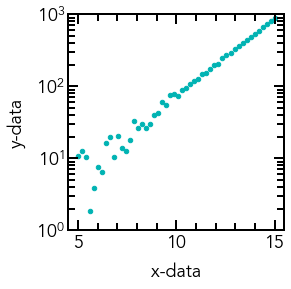

In [6]:
# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

# Create figure object and store it in a variable called 'fig'
fig = plt.figure(figsize=(3, 3))

# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])

# Set the y-axis scaling to logarithmic
ax.set_yscale('log')

# Edit the major and minor ticks of the x and y axes
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')

# Edit the major and minor tick locations of x and y axes
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(mpl.ticker.LogLocator(base=10.0))
#ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(100))

# Plot the noisy exponential data
ax.scatter(x_dummy, y_dummy, s=20, color='#00b3b3', label='Data')

# Add the x and y-axis labels
ax.set_xlabel('x-data', labelpad=10)
ax.set_ylabel('y-data', labelpad=10)

# Set the axis limits
ax.set_xlim(4.5, 15.5)
ax.set_ylim(1, 1000)

#plt.savefig('dummy_dataset_exponential_semilog.png', dpi=100, bbox_inches='tight')
plt.show()

# Fit noisy data to exponential function

In [7]:
# Fit the dummy exponential data
pars, cov = curve_fit(f=exponential, xdata=x_dummy, ydata=y_dummy, p0=[0, 0], bounds=(-np.inf, np.inf))

# Calculate the standard deviations of parameters and the residuals

In [8]:
# Get the standard deviations of the parameters (square roots of the diagonal of the covariance)
stdevs = np.sqrt(np.diag(cov))

# Calculate the residuals
res = y_dummy - exponential(x_dummy, *pars)

# Plot exponential fit on top of data

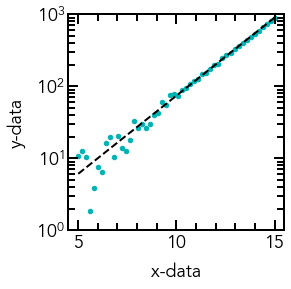

In [9]:
# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

# Create figure object and store it in a variable called 'fig'
fig = plt.figure(figsize=(3, 3))

# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])

# Set the y-axis scaling to logarithmic
ax.set_yscale('log')

# Edit the major and minor ticks of the x and y axes
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')

# Edit the major and minor tick locations of x and y axes
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(mpl.ticker.LogLocator(base=10.0))
#ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(100))

# Plot the noisy exponential data
ax.scatter(x_dummy, y_dummy, s=20, color='#00b3b3', label='Data')
ax.plot(x_dummy, exponential(x_dummy, *pars), linestyle='--', linewidth=2, color='black')

# Add the x and y-axis labels
ax.set_xlabel('x-data', labelpad=10)
ax.set_ylabel('y-data', labelpad=10)

# Set the axis limits
ax.set_xlim(4.5, 15.5)
ax.set_ylim(1, 1000)

#plt.savefig('dummy_dataset_exponential_fit.png', dpi=100, bbox_inches='tight')
plt.show()

# Plot the residuals of exponential fit

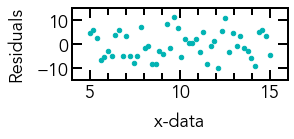

In [10]:
# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

# Create figure object and store it in a variable called 'fig'
fig = plt.figure(figsize=(3, 1))

# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])

# Edit the major and minor ticks of the x and y axes
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')

# Edit the major and minor tick locations of x and y axes
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(10))

# Plot the noisy exponential data
ax.scatter(x_dummy, res, s=20, color='#00b3b3', label='Data')

# Add the x and y-axis labels
ax.set_xlabel('x-data', labelpad=10)
ax.set_ylabel('Residuals', labelpad=10)

# Set the axis limits
ax.set_xlim(4, 16)
ax.set_ylim(-15, 15)

#plt.savefig('dummy_dataset_residuals.png', dpi=100, bbox_inches='tight')
plt.show()

# Define power-law function

In [11]:
# Function to calculate the power-law with constants a and b
def power_law(x, a, b):
    return a*np.power(x, b)

# Generate dummy dataset

In [12]:
# Generate dummy dataset
x_dummy = np.linspace(start=1, stop=1000, num=100)
y_dummy = power_law(x_dummy, 1, 0.5)

# Add noise to the power-law data

In [13]:
# Add noise from a Gaussian distribution
noise = 1.5*np.random.normal(size=y_dummy.size)
y_dummy = y_dummy + noise

# Plot noisy power-law data

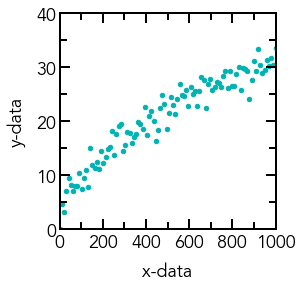

In [14]:
# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

# Create figure object and store it in a variable called 'fig'
fig = plt.figure(figsize=(3, 3))

# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])

# Set the y-axis scaling to logarithmic
#ax.set_yscale('log')

# Edit the major and minor ticks of the x and y axes
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')

# Edit the major and minor tick locations of x and y axes
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(200))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(100))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(10))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(5))

# Plot the noisy exponential data
ax.scatter(x_dummy, y_dummy, s=20, color='#00b3b3', label='Data')

# Add the x and y-axis labels
ax.set_xlabel('x-data', labelpad=10)
ax.set_ylabel('y-data', labelpad=10)

# Set the axis limits
ax.set_xlim(0, 1000)
ax.set_ylim(0, 40)

#plt.savefig('dummy_dataset_powerlaw.png', dpi=100, bbox_inches='tight')
plt.show()

# Plot power-law data on a log-log plot

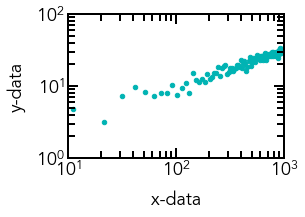

In [15]:
# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

# Create figure object and store it in a variable called 'fig'
fig = plt.figure(figsize=(3, 2))

# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])

# Set the x and y-axis scaling to logarithmic
ax.set_xscale('log')
ax.set_yscale('log')

# Edit the major and minor ticks of the x and y axes
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')

# Edit the major and minor tick locations of x and y axes
ax.xaxis.set_major_locator(mpl.ticker.LogLocator(base=10.0))
ax.yaxis.set_major_locator(mpl.ticker.LogLocator(base=10.0))

# Plot the noisy exponential data
ax.scatter(x_dummy, y_dummy, s=20, color='#00b3b3', label='Data')

# Add the x and y-axis labels
ax.set_xlabel('x-data', labelpad=10)
ax.set_ylabel('y-data', labelpad=10)

# Set the axis limits
ax.set_xlim(10, 1000)
ax.set_ylim(1, 100)

#plt.savefig('dummy_dataset_powerlaw_log.png', dpi=100, bbox_inches='tight')
plt.show()

# Fit data and calculate standard deviations and residuals

In [16]:
# Fit the dummy exponential data
pars, cov = curve_fit(f=power_law, xdata=x_dummy, ydata=y_dummy, p0=[0, 0], bounds=(-np.inf, np.inf))

# Get the standard deviations of the parameters (square roots of the diagonal of the covariance)
stdevs = np.sqrt(np.diag(cov))

# Calculate the residuals
res = y_dummy - power_law(x_dummy, *pars)

# Plot noisy data with overlaid fit

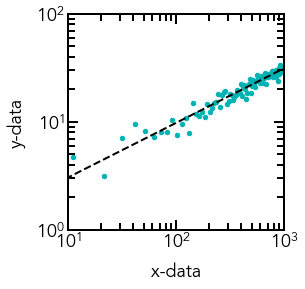

In [17]:
# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

# Create figure object and store it in a variable called 'fig'
fig = plt.figure(figsize=(3, 3))

# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])

# Set the x and y-axis scaling to logarithmic
ax.set_xscale('log')
ax.set_yscale('log')

# Edit the major and minor ticks of the x and y axes
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')

# Edit the major and minor tick locations of x and y axes
ax.xaxis.set_major_locator(mpl.ticker.LogLocator(base=10.0))
ax.yaxis.set_major_locator(mpl.ticker.LogLocator(base=10.0))

# Plot the noisy exponential data
ax.scatter(x_dummy, y_dummy, s=20, color='#00b3b3', label='Data')
ax.plot(x_dummy, power_law(x_dummy, *pars), linewidth=2, linestyle='--', color='black')

# Add the x and y-axis labels
ax.set_xlabel('x-data', labelpad=10)
ax.set_ylabel('y-data', labelpad=10)

# Set the axis limits
ax.set_xlim(10, 1000)
ax.set_ylim(1, 100)

#plt.savefig('dummy_dataset_powerlaw_fit.png', dpi=100, bbox_inches='tight')
plt.show()

# Plot residuals of power-law fit

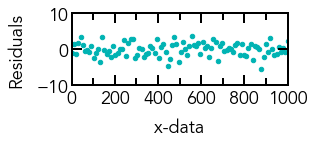

In [18]:
# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

# Create figure object and store it in a variable called 'fig'
fig = plt.figure(figsize=(3, 1))

# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])

# Edit the major and minor ticks of the x and y axes
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')

# Edit the major and minor tick locations of x and y axes
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(200))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(100))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(10))

# Plot the noisy exponential data
ax.scatter(x_dummy, res, s=20, color='#00b3b3', label='Data')

# Add the x and y-axis labels
ax.set_xlabel('x-data', labelpad=10)
ax.set_ylabel('Residuals', labelpad=10)

# Set the axis limits
ax.set_xlim(0, 1000)
ax.set_ylim(-10, 10)

#plt.savefig('dummy_dataset_powerlaw_residuals.png', dpi=100, bbox_inches='tight')
plt.show()

# Define Gaussian function

In [19]:
# Function to calculate the Gaussian with constants a, b, and c
def gaussian(x, a, b, c):
    return a*np.exp(-np.power(x - b, 2)/(2*np.power(c, 2)))

# Generate dummy dataset

In [20]:
# Generate dummy dataset
x_dummy = np.linspace(start=-10, stop=10, num=100)
y_dummy = gaussian(x_dummy, 8, -1, 3)

# Add noise to data

In [21]:
# Add noise from a Gaussian distribution
noise = 0.5*np.random.normal(size=y_dummy.size)
y_dummy = y_dummy + noise

# Plot noisy Gaussian data

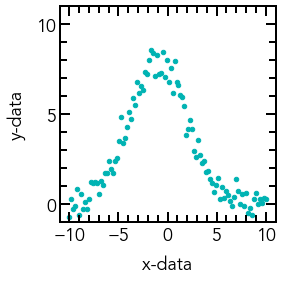

In [22]:
# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

# Create figure object and store it in a variable called 'fig'
fig = plt.figure(figsize=(3, 3))

# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])

# Edit the major and minor ticks of the x and y axes
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')

# Edit the major and minor tick locations of x and y axes
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))

# Plot the noisy exponential data
ax.scatter(x_dummy, y_dummy, s=20, color='#00b3b3', label='Data')

# Add the x and y-axis labels
ax.set_xlabel('x-data', labelpad=10)
ax.set_ylabel('y-data', labelpad=10)

# Set the axis limits
ax.set_xlim(-11, 11)
ax.set_ylim(-1, 11)

#plt.savefig('dummy_dataset_gaussian.png', dpi=100, bbox_inches='tight')
plt.show()

# Fit data and calculate standard deviations and residuals

In [23]:
# Fit the dummy power-law data
pars, cov = curve_fit(f=gaussian, xdata=x_dummy, ydata=y_dummy, p0=[5, -1, 1], bounds=(-np.inf, np.inf))

# Get the standard deviations of the parameters (square roots of the # diagonal of the covariance)
stdevs = np.sqrt(np.diag(cov))

# Calculate the residuals
res = y_dummy - gaussian(x_dummy, *pars)

# Plot Gaussian data with overlaid fit

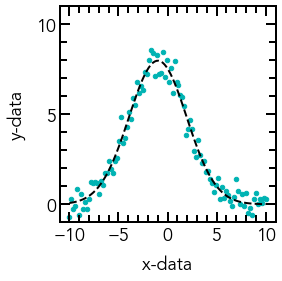

In [24]:
# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

# Create figure object and store it in a variable called 'fig'
fig = plt.figure(figsize=(3, 3))

# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])

# Edit the major and minor ticks of the x and y axes
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')

# Edit the major and minor tick locations of x and y axes
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))

# Plot the noisy exponential data
ax.scatter(x_dummy, y_dummy, s=20, color='#00b3b3', label='Data')
ax.plot(x_dummy, gaussian(x_dummy, *pars), linewidth=2, linestyle='--', color='black')

# Add the x and y-axis labels
ax.set_xlabel('x-data', labelpad=10)
ax.set_ylabel('y-data', labelpad=10)

# Set the axis limits
ax.set_xlim(-11, 11)
ax.set_ylim(-1, 11)

#plt.savefig('dummy_dataset_gaussian_fit.png', dpi=100, bbox_inches='tight')
plt.show()

# Plot residuals of Gaussian fit

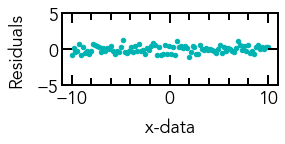

In [25]:
# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

# Create figure object and store it in a variable called 'fig'
fig = plt.figure(figsize=(3, 1))

# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])

# Edit the major and minor ticks of the x and y axes
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')

# Edit the major and minor tick locations of x and y axes
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(2))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(5))

# Plot the noisy exponential data
ax.scatter(x_dummy, res, s=20, color='#00b3b3', label='Data')

# Add the x and y-axis labels
ax.set_xlabel('x-data', labelpad=10)
ax.set_ylabel('Residuals', labelpad=10)

# Set the axis limits
ax.set_xlim(-11, 11)
ax.set_ylim(-5, 5)

#plt.savefig('dummy_dataset_gaussian_residuals.png', dpi=100, bbox_inches='tight')
plt.show()